In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from mllib.model import KerasSurrogate
from helper_functions.scan_helper_functions import AdjustedRSquared
from helper_functions.ml_helper_functions import RSquaredSeparated, AdjustedRSquaredSeparated
from helper_functions.invertible_neural_network import InvertibleNetworkSurrogate
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score,mean_absolute_percentage_error

In [2]:
seed = 49857
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))
directory

'/data/user/boiger_r/aerosol'

In [4]:
test_datafile = directory +'/aerosol_data/raw_data/test_scaling_woangles/logP11_P12_532/test_dataset.hdf5'



In [5]:
measurement_file = directory+'/aerosol_data/raw_data/phase_function_experimental_data.csv'


In [6]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')

In [7]:
meas = pd.read_csv(measurement_file,)

In [8]:
meas = meas.drop("Unnamed: 0", axis =1)

In [9]:
meas.describe()

angles         P11    -P12/P11
count  141.000000  141.000000  141.000000
mean    89.028369   23.429281    0.187603
std     44.369060   45.404274    0.284182
min     15.000000    1.042077   -0.351540
25%     50.000000    1.937589    0.012442
50%     93.000000    2.751346    0.136606
75%    128.000000   10.079655    0.403594
max    163.000000  187.941926    0.775287

In [33]:
meas['angles'][70]

93.0

In [25]:
angles = [0:1:85]

SyntaxError: invalid syntax (<ipython-input-25-731830e1b8c1>, line 1)

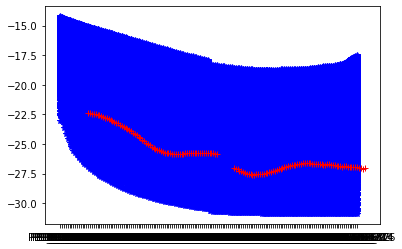

In [29]:
for i in range(20000):
    plt.plot(qoi_test.iloc[i][0:160],'b*')
plt.plot(meas['angles'],np.log(meas['P11']*1e-12),'r+')

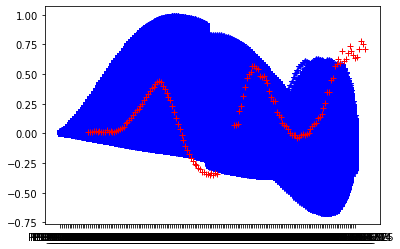

In [28]:

for i in range(20000):
    plt.plot(qoi_test.iloc[i][161:],'b*')
plt.plot(meas['angles'],meas['-P12/P11'],'r+')

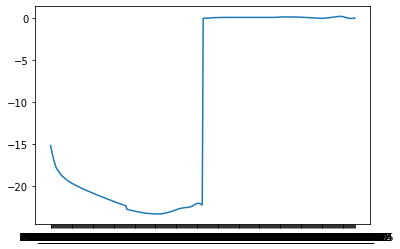

In [13]:
plt.plot(qoi_test.iloc[100])

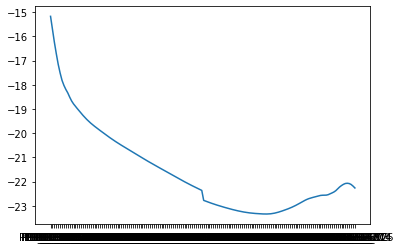

In [14]:
plt.plot(qoi_test.iloc[100][0:160])

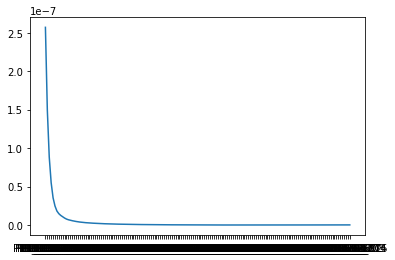

In [15]:
plt.plot(np.exp(qoi_test.iloc[100][0:160]))

In [16]:
exp_qoi = np.exp(qoi_test)

In [17]:
exp_qoi.describe()

P11_0.532_5   P11_0.532_6   P11_0.532_7   P11_0.532_8   P11_0.532_9  \
count  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean   2.059131e-07  1.619858e-07  1.296551e-07  1.057225e-07  8.782059e-08   
std    1.346939e-07  1.195997e-07  1.092837e-07  1.008264e-07  9.337115e-08   
min    9.623400e-11  9.406600e-11  5.557200e-11  3.361800e-11  2.111200e-11   
25%    9.422250e-08  6.641975e-08  4.482825e-08  3.030300e-08  2.070075e-08   
50%    1.885600e-07  1.340550e-07  9.496350e-08  6.854450e-08  4.961500e-08   
75%    3.015400e-07  2.369275e-07  1.899800e-07  1.533650e-07  1.264125e-07   
max    6.653900e-07  6.225900e-07  5.771700e-07  5.413200e-07  5.080300e-07   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
count  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean   7.432179e-08  6.356587e-08  5.522328e-08  4.825207e-08  4.278300e-08   
std    8.641414e-08  8.014705e-08  7.431271e-08  6.867929e-08  6.395925e-08   
min    1.484400e-11  1.057700e-11  7.975600e-12  6.425000e-12  5.354300e-12   
25%    1.493250e-08  1.091475e-08  8.318575e-09  6.648700e-09  5.437550e-09   
50%    3.681800e-08  2.736650e-08  2.090750e-08  1.634100e-08  1.297500e-08   
75%    1.031425e-07  8.521150e-08  7.143050e-08  5.953600e-08  4.990450e-08   
max    4.794400e-07  4.580200e-07  4.360800e-07  4.129900e-07  3.916600e-07   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
count  ...   20000.000000   20000.000000   20000.000000   20000.000000   
mean   ...       0.916269       0.916153       0.917381       0.919795   
std    ...       0.166415       0.159736       0.151338       0.139772   
min    ...       0.529136       0.538203       0.551447       0.569077   
25%    ...       0.813691       0.819259       0.826476       0.836478   
50%    ...       0.952344       0.950624       0.949459       0.950698   
75%    ...       1.004441       1.000738       0.998568       0.998118   
max    ...       1.767259       1.788398       1.778268       1.726904   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
count   20000.000000   20000.000000   20000.000000   20000.000000   
mean        0.923934       0.930146       0.938486       0.948970   
std         0.126351       0.112178       0.097307       0.083255   
min         0.591248       0.618734       0.658138       0.701980   
25%         0.849589       0.863756       0.880533       0.899602   
50%         0.954536       0.959926       0.966545       0.972463   
75%         0.998495       1.000726       1.005841       1.007294   
max         1.661100       1.581320       1.510680       1.431925   

       P12_0.532_174  P12_0.532_175  
count   20000.000000   20000.000000  
mean        0.960870       0.972921  
std         0.070768       0.060539  
min         0.712397       0.727938  
25%         0.920189       0.941294  
50%         0.979514       0.986799  
75%         1.007779       1.007750  
max         1.308891       1.157011  

[8 rows x 320 columns]